# KAIM Week 8 and 9 Challenges

## **Task 1: Data Analysis and Preprocessing**

1. Handle Missing Values
    - Imputeordropmissing values
 
2. Data Cleaning
    - Removeduplicates
    - Correct data types

3. Exploratory Data Analysis (EDA)
    - Univariate analysis
    - Bivariate analysis

4. MergeDatasets for Geolocation Analysis
    - ConvertIPaddresses to integer format
    - MergeFraud_Data.csv with IpAddress_to_Country.csv

5. Feature Engineering
    - Transaction frequency and velocity for Fraud_Data.csv
    - Time-Basedfeatures for Fraud_Data.csv
         i. hour_of _day
         ii. day_of_week

6. Normalization and Scaling

7. EncodeCategorical Features

## Import Necessary Libraries

In [49]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

# Set plot style for better visuals
sns.set(style="whitegrid")

## Load Datasets

In [50]:
# Load the datasets
fraud_data = pd.read_csv('../data/Fraud_Data.csv')
ip_data = pd.read_csv('../data/IpAddress_to_Country.csv')
credit_data = pd.read_csv('../data/creditcard.csv')

## Data Overview

In [51]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [52]:
ip_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [53]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [54]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [55]:
ip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [56]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Handling Missing Values

In [57]:
# Check for missing values in fraud_data
print(fraud_data.isnull().sum())

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [58]:
# Check credit_data missing values
print(credit_data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [59]:
# Check ip_address missing values
print(ip_data.isnull().sum())

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


**No Missing value to handle**

## Data Cleaning

### Duplicate Vaues

In [60]:
# Remove duplicates
fraud_data = fraud_data.drop_duplicates()
credit_data = credit_data.drop_duplicates()
ip_data = ip_data.drop_duplicates()
# Confirm if duplicates are removed
print(f"Remaining duplicates in fraud_data: {fraud_data.duplicated().sum()}")
print(f"Remaining duplicates in credit_data: {credit_data.duplicated().sum()}")
print(f"Remaining duplicates in ip_data: {ip_data.duplicated().sum()}")

Remaining duplicates in fraud_data: 0
Remaining duplicates in credit_data: 0
Remaining duplicates in ip_data: 0


## Correct Data Type

In [61]:
# Check and convert data types
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Ensure categorical features are properly encoded
fraud_data['source'] = fraud_data['source'].astype('category')
fraud_data['browser'] = fraud_data['browser'].astype('category')
fraud_data['sex'] = fraud_data['sex'].astype('category')

In [62]:
# Confirm data types
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  category      
 6   browser         151112 non-null  category      
 7   sex             151112 non-null  category      
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: category(3), datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 9.7+ MB


## Exploratory Data Analysis (EDA)

### Univariant Analysis

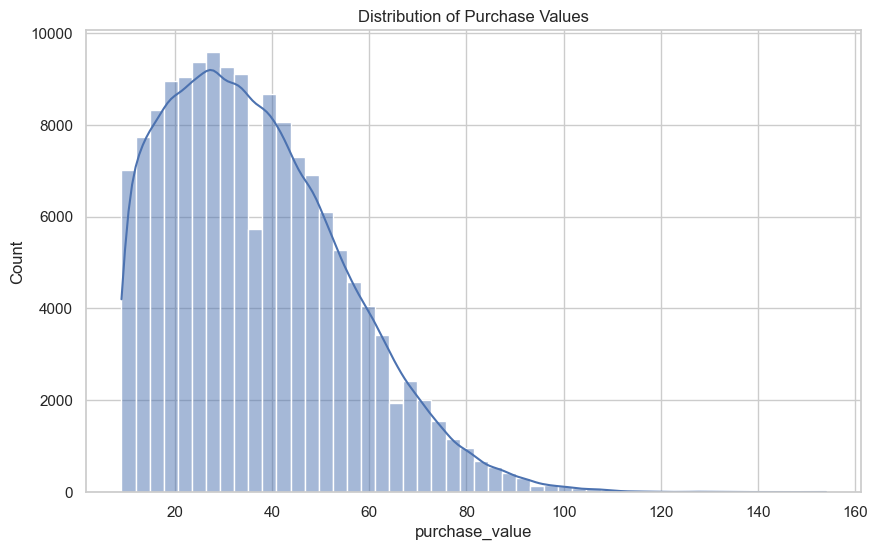

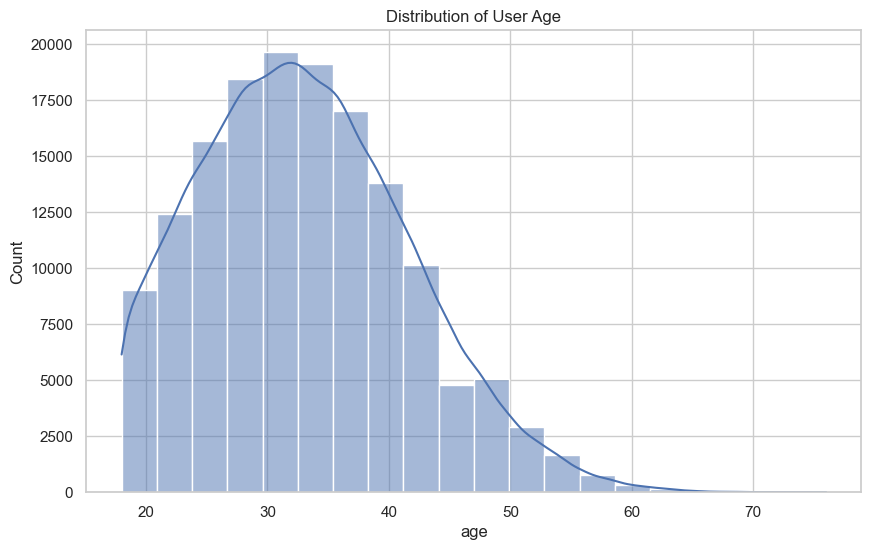

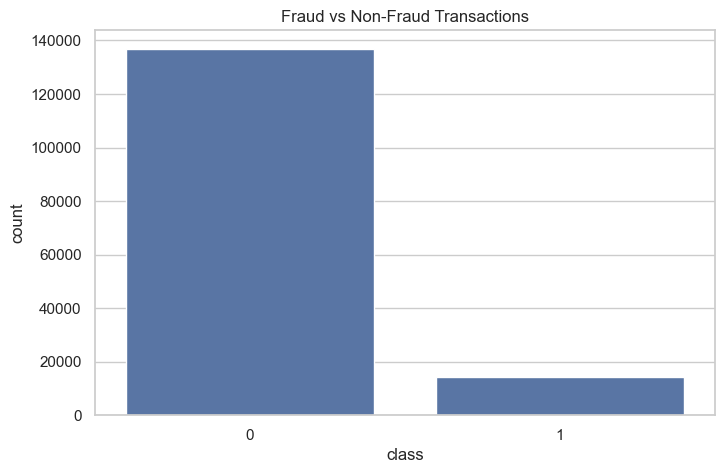

In [63]:
# Distribution of purchase values
plt.figure(figsize=(10, 6))
sns.histplot(fraud_data['purchase_value'], bins=50, kde=True)
plt.title('Distribution of Purchase Values')
plt.show()

# Distribution of user age
plt.figure(figsize=(10, 6))
sns.histplot(fraud_data['age'], bins=20, kde=True)
plt.title('Distribution of User Age')
plt.show()

# Countplot for fraud detection
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=fraud_data)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

### Bivariant Analysis

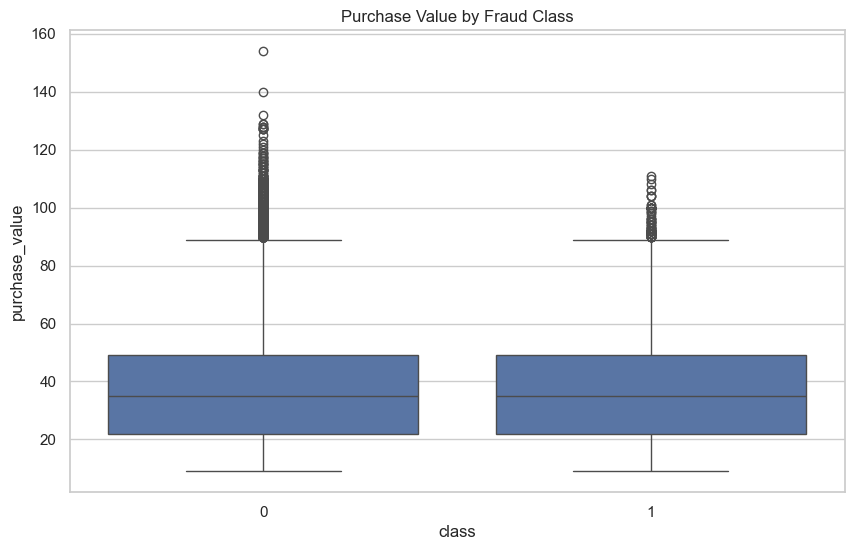

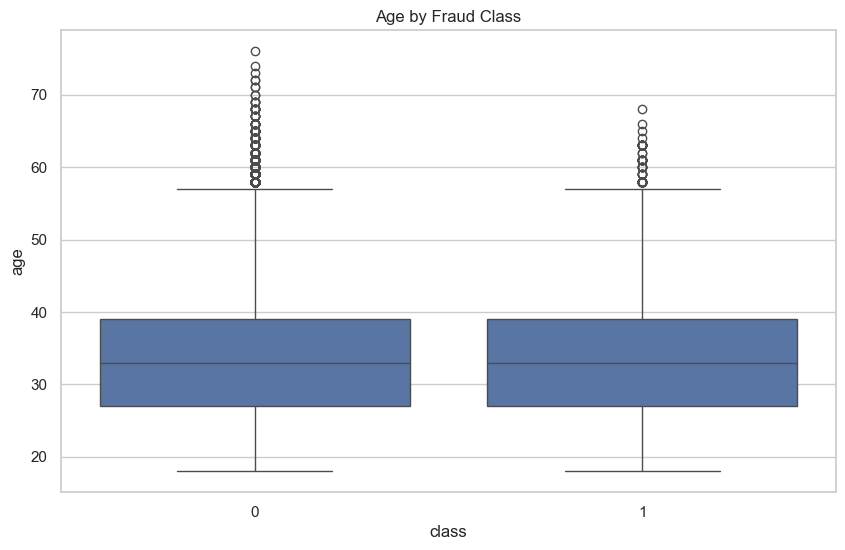

In [64]:
# Relationship between purchase value and fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='purchase_value', data=fraud_data)
plt.title('Purchase Value by Fraud Class')
plt.show()

# Relationship between user age and fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='age', data=fraud_data)
plt.title('Age by Fraud Class')
plt.show()

### Fraud by Browser

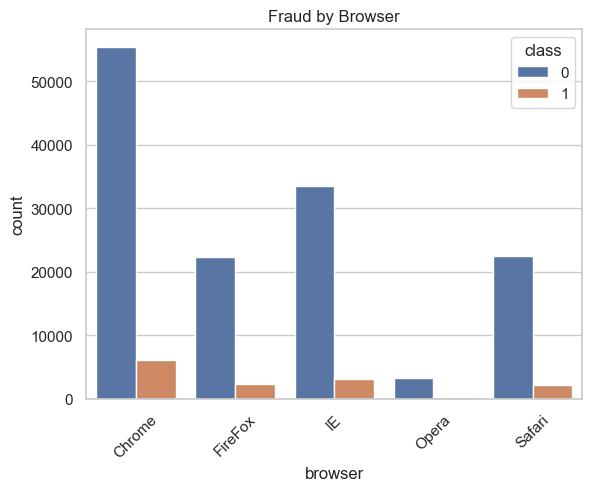

In [65]:
# Browser and fraud analysis
sns.countplot(x='browser', hue='class', data=fraud_data)
plt.title('Fraud by Browser')
plt.xticks(rotation=45)
plt.show()

### Multivariant Analysis

In [66]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()

fraud_data['source'] = label_encoder.fit_transform(fraud_data['source'])
fraud_data['browser'] = label_encoder.fit_transform(fraud_data['browser'])
fraud_data['sex'] = label_encoder.fit_transform(fraud_data['sex'])


# Check the dataset after encoding
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  int64         
 6   browser         151112 non-null  int64         
 7   sex             151112 non-null  int64         
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(7), object(1)
memory usage: 12.7+ MB


### Correlation

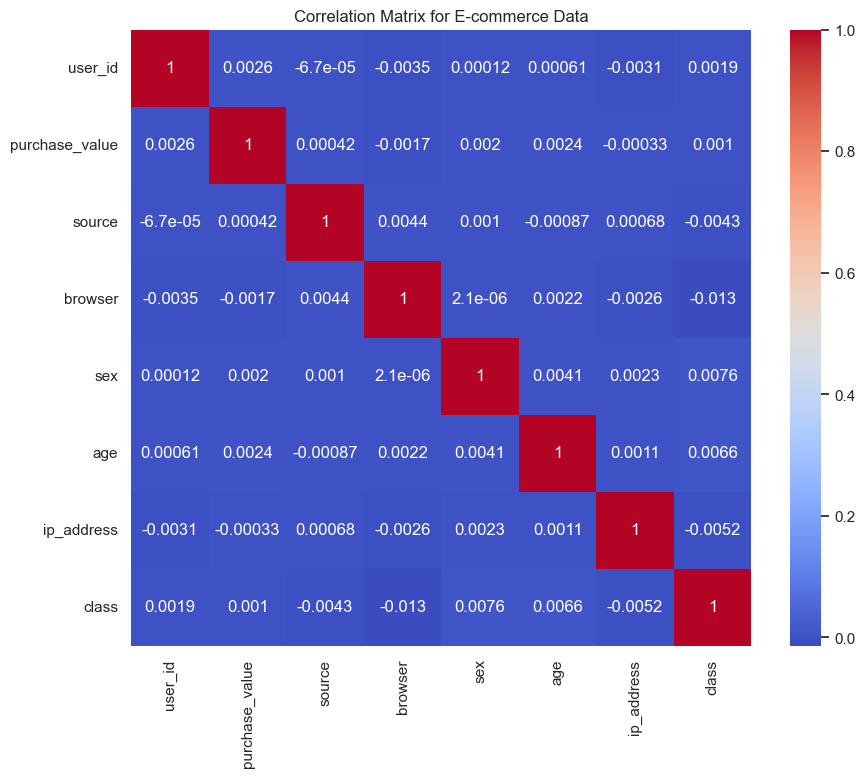

In [67]:
# Correlation matrix for fraud_data

plt.figure(figsize=(10,8))
sns.heatmap(fraud_data.drop(columns=['device_id', 'signup_time', 'purchase_time']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for E-commerce Data')
plt.show()

## Pair-plot

In [68]:
# Pairplot for the credit card dataset
#sns.pairplot(credit_data[['V1', 'V2', 'V3', 'Amount', 'Class']], hue='Class')
#plt.show()

## Outlier Detection

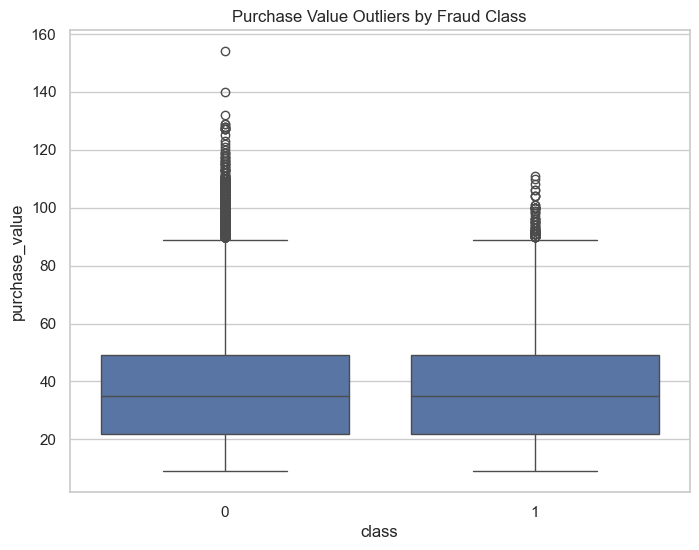

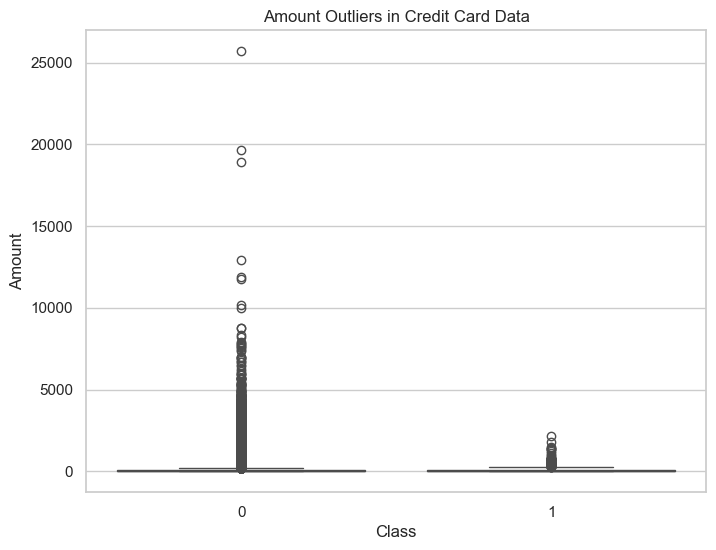

In [69]:
# Boxplot for detecting outliers in purchase_value
plt.figure(figsize=(8, 6))
sns.boxplot(data=fraud_data, x='class', y='purchase_value')
plt.title('Purchase Value Outliers by Fraud Class')
plt.show()

# Outlier detection in credit card data (Amount)
plt.figure(figsize=(8, 6))
sns.boxplot(data=credit_data, x='Class', y='Amount')
plt.title('Amount Outliers in Credit Card Data')
plt.show()

## Class Imbalance Check

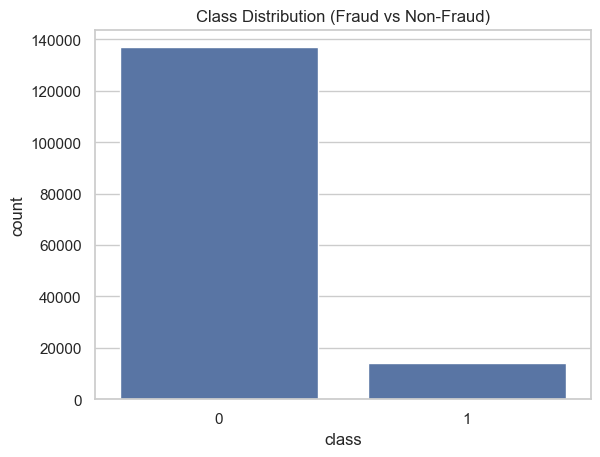

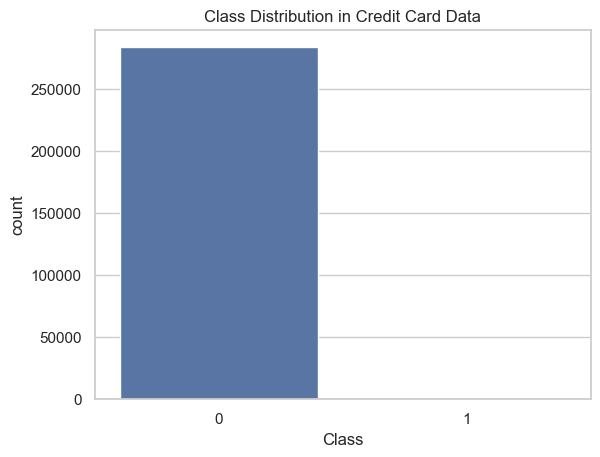

In [70]:
# Class distribution in e-commerce data
sns.countplot(x='class', data=fraud_data)
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.show()

# Class distribution in credit card data
sns.countplot(x='Class', data=credit_data)
plt.title('Class Distribution in Credit Card Data')
plt.show()

## Merge Dataset for Geolocation Analysis

### Convert IP Address into Integer format

In [71]:
def convert_ip_to_int(ip_address):
    try:
        # Ensure IP address is a valid string before conversion
        if isinstance(ip_address, str):
            return int(ip_address.replace('.', ''))
        else:
            return None
    except Exception as e:
        print(f"Error converting IP address {ip_address}: {e}")
        return None

In [72]:
 # Ensure 'ip_address' is treated as a string to handle missing values
fraud_data['ip_address'] = fraud_data['ip_address'].astype(str)

# Convert IP addresses to integer format, handling errors
fraud_data['ip_address'] = fraud_data['ip_address'].apply(lambda x: convert_ip_to_int(x) if x != 'nan' else None)

In [73]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,2,0,1,39,73275836879972,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,0,0,0,53,350311387865908,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,2,3,1,53,262147382011095,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,2,4,1,41,384054244391396,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,0,4,1,45,415583117452712,0


In [74]:
# Ensure both 'lower_bound_ip_address' and 'upper_bound_ip_address' in ip_data are strings
ip_data['lower_bound_ip_address'] = ip_data['lower_bound_ip_address'].astype(str)
ip_data['upper_bound_ip_address'] = ip_data['upper_bound_ip_address'].astype(str)

# Convert the IP addresses in the IP-to-country dataset to integer format
ip_data['lower_bound_ip_addres'] = ip_data['lower_bound_ip_address'].apply(lambda x: convert_ip_to_int(x) if x != 'nan' else None)
ip_data['upper_bound_ip_adress'] = ip_data['upper_bound_ip_address'].apply(lambda x: convert_ip_to_int(x) if x != 'nan' else None)

In [75]:
ip_data = ip_data.iloc[:, 2:]
ip_data.head()

,country,lower_bound_ip_addres,upper_bound_ip_adress
0,Australia,167772160,16777471
1,China,167774720,16777727
2,China,167777280,16778239
3,Australia,167782400,16779263
4,China,167792640,16781311


### Merge Fraud Dataset with IP Dataset

In [76]:
merged_df = pd.concat([fraud_data, ip_data], axis = 1)
merged_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,lower_bound_ip_addres,upper_bound_ip_adress
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,2,0,1,39,73275836879972,0,Australia,167772160.0,16777471.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,0,0,0,53,350311387865908,0,China,167774720.0,16777727.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,2,3,1,53,262147382011095,1,China,167777280.0,16778239.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,2,4,1,41,384054244391396,0,Australia,167782400.0,16779263.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,0,4,1,45,415583117452712,0,China,167792640.0,16781311.0


In [77]:
fraud_data.shape, ip_data.shape

((151112, 11), (138846, 3))

In [78]:
merged_df.isnull().sum()

user_id                      0
signup_time                  0
purchase_time                0
purchase_value               0
device_id                    0
source                       0
browser                      0
sex                          0
age                          0
ip_address                   0
class                        0
country                  12266
lower_bound_ip_addres    12266
upper_bound_ip_adress    12266
dtype: int64

In [79]:
fraud_data_combined = merged_df.dropna()

In [80]:
merged_df.shape, fraud_data_combined.shape

((151112, 14), (138846, 14))

## Fraud Rate by country

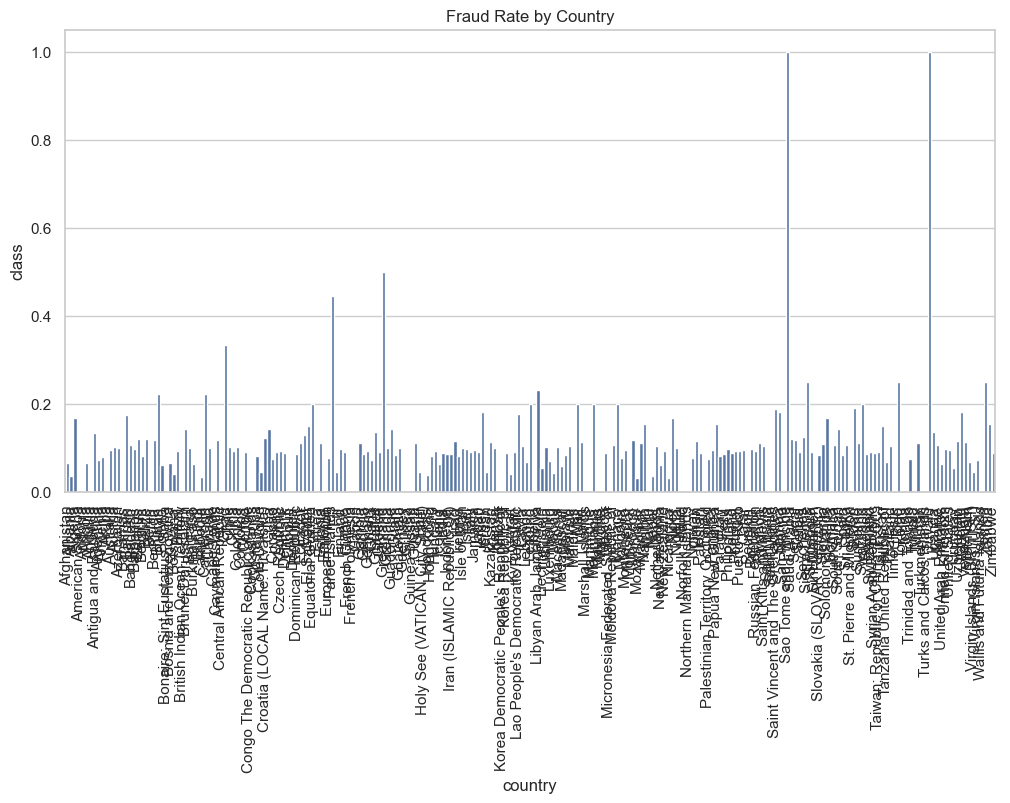

In [81]:
# Barplot for transaction distribution by country
plt.figure(figsize=(12, 6))
country_fraud = fraud_data_combined.groupby('country')['class'].mean().reset_index()
sns.barplot(x='country', y='class', data=country_fraud)
plt.title('Fraud Rate by Country')
plt.xticks(rotation=90)
plt.show()

### Time Distribution of Credit Card Transaction

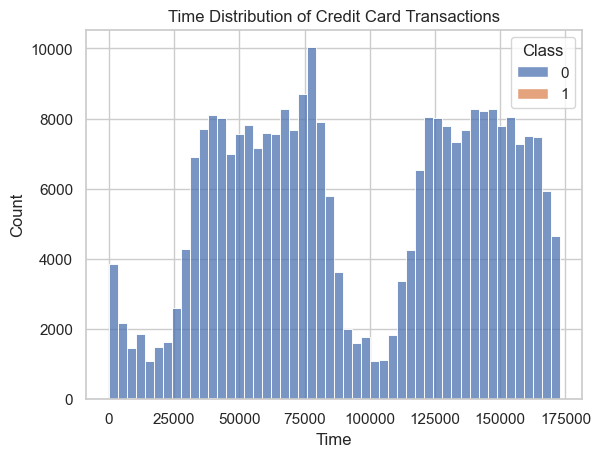

In [82]:
# Time analysis in credit card data
sns.histplot(credit_data, x='Time', hue='Class', multiple='stack', bins=50)
plt.title('Time Distribution of Credit Card Transactions')
plt.show()

## Feature Engineering

### Tansaction Frequency and Velocity

In [83]:
# Calculate transaction frequency and velocity
fraud_data_combined['signup_purchase_diff'] = (fraud_data_combined['purchase_time'] - fraud_data_combined['signup_time']).dt.total_seconds()

# Calculate total transactions per user
fraud_data_combined['transaction_count'] = fraud_data_combined.groupby('user_id')['user_id'].transform('count')

### Time Based Features

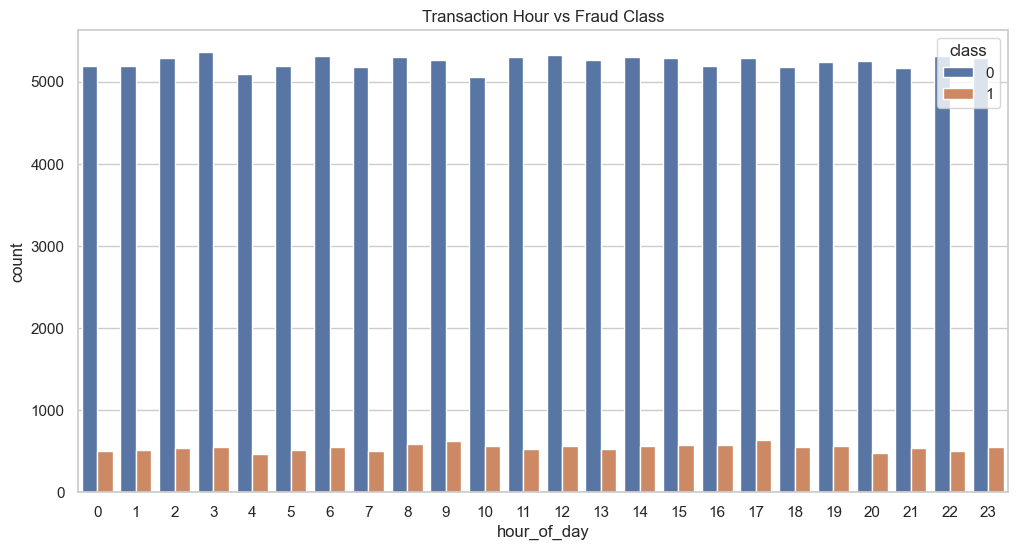

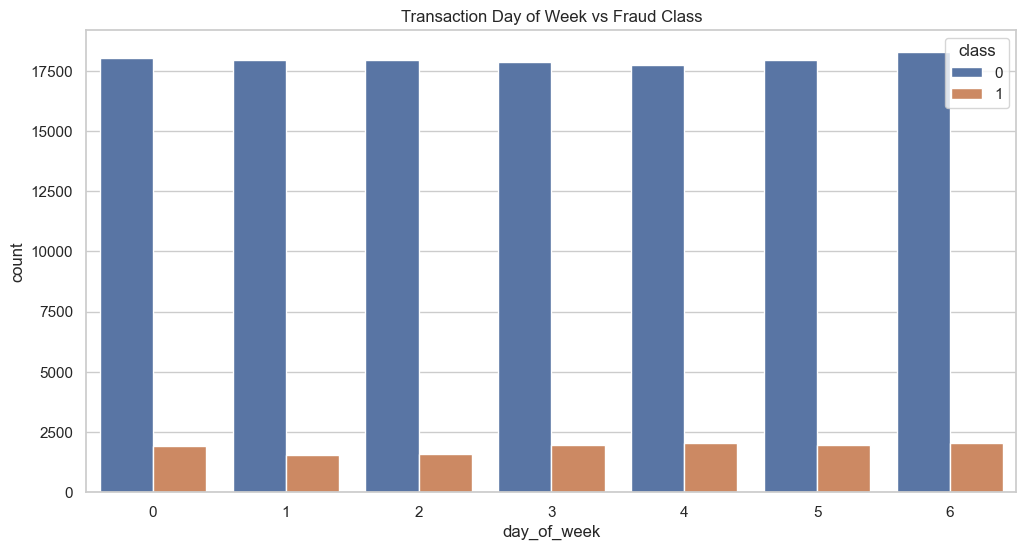

In [84]:
# Extract hour of the day and day of the week
fraud_data_combined['hour_of_day'] = fraud_data_combined['purchase_time'].dt.hour
fraud_data_combined['day_of_week'] = fraud_data_combined['purchase_time'].dt.dayofweek

# Visualize time-based features
plt.figure(figsize=(12, 6))
sns.countplot(x='hour_of_day', hue='class', data=fraud_data_combined)
plt.title('Transaction Hour vs Fraud Class')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', hue='class', data=fraud_data_combined)
plt.title('Transaction Day of Week vs Fraud Class')
plt.show()

## Time-series Analysis (hourly basis)

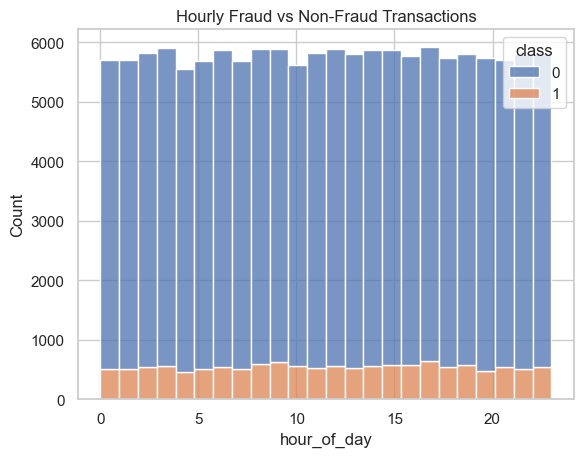

In [85]:
sns.histplot(fraud_data_combined, x='hour_of_day', hue='class', multiple='stack', bins=24)
plt.title('Hourly Fraud vs Non-Fraud Transactions')
plt.show()

## Normalization and Scaling

In [86]:
# Normalize the transaction amount and signup_purchase_diff
scaler = StandardScaler()

fraud_data_combined[['purchase_value', 'signup_purchase_diff']] = scaler.fit_transform(fraud_data_combined[['purchase_value', 'signup_purchase_diff']])

## Encode Categorical Features

In [87]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()

fraud_data_combined['source'] = label_encoder.fit_transform(fraud_data_combined['source'])
fraud_data_combined['browser'] = label_encoder.fit_transform(fraud_data_combined['browser'])
fraud_data_combined['sex'] = label_encoder.fit_transform(fraud_data_combined['sex'])
fraud_data_combined['country'] = label_encoder.fit_transform(fraud_data_combined['country'])

# Check the dataset after encoding
fraud_data_combined.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,lower_bound_ip_addres,upper_bound_ip_adress,signup_purchase_diff,transaction_count,hour_of_day,day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.159776,QVPSPJUOCKZAR,2,0,1,39,73275836879972,0,11,167772160.0,16777471.0,-0.136131,1,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142137,EOGFQPIZPYXFZ,0,0,0,53,350311387865908,0,42,167774720.0,16777727.0,-1.571694,1,1,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.196713,YSSKYOSJHPPLJ,2,3,1,53,262147382011095,1,42,167777280.0,16778239.0,-1.577432,1,18,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385981,ATGTXKYKUDUQN,2,4,1,41,384054244391396,0,11,167782400.0,16779263.0,-1.420057,1,13,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.113102,NAUITBZFJKHWW,0,4,1,45,415583117452712,0,42,167792640.0,16781311.0,-0.182575,1,18,2


In [88]:
fraud_data_combined.shape

(138846, 18)

In [89]:
fraud_data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138846 entries, 0 to 138845
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                138846 non-null  int64         
 1   signup_time            138846 non-null  datetime64[ns]
 2   purchase_time          138846 non-null  datetime64[ns]
 3   purchase_value         138846 non-null  float64       
 4   device_id              138846 non-null  object        
 5   source                 138846 non-null  int64         
 6   browser                138846 non-null  int64         
 7   sex                    138846 non-null  int64         
 8   age                    138846 non-null  int64         
 9   ip_address             138846 non-null  int64         
 10  class                  138846 non-null  int64         
 11  country                138846 non-null  int64         
 12  lower_bound_ip_addres  138846 non-null  float64  

In [90]:
fraud_data_combined['country'].nunique()

235

In [91]:
fraud_data_combined['device_id'].nunique()

127281

In [92]:
fraud_data_combined.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'country', 'lower_bound_ip_addres', 'upper_bound_ip_adress',
       'signup_purchase_diff', 'transaction_count', 'hour_of_day',
       'day_of_week'],
      dtype='object')

In [93]:
fraud_data_combined.drop(columns=['device_id', 'signup_time', 'purchase_time'], inplace = True)
fraud_data_combined.rename(columns={'class': 'Class'}, inplace = True)
fraud_data_combined.columns

Index(['user_id', 'purchase_value', 'source', 'browser', 'sex', 'age',
       'ip_address', 'Class', 'country', 'lower_bound_ip_addres',
       'upper_bound_ip_adress', 'signup_purchase_diff', 'transaction_count',
       'hour_of_day', 'day_of_week'],
      dtype='object')

In [94]:
fraud_data_combined.to_csv('../data/cleaned_data_1.csv', index=False, encoding='utf-8')

## Feature Importance (Preliminary Model Insights)

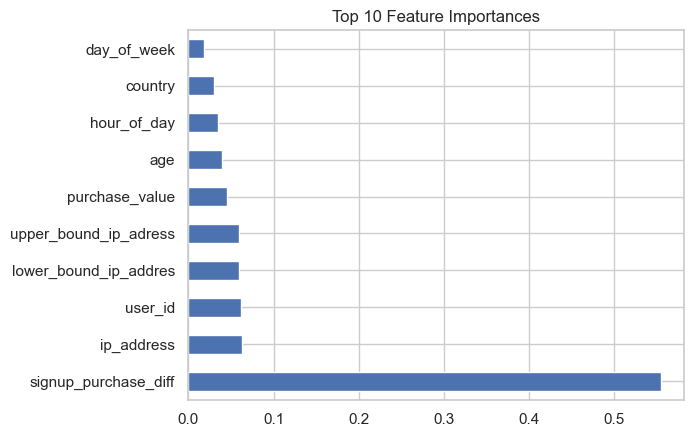

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare data for the model (e-commerce)
X = fraud_data_combined.drop(columns=['Class'])
y = fraud_data_combined['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

## Anomaly Detection

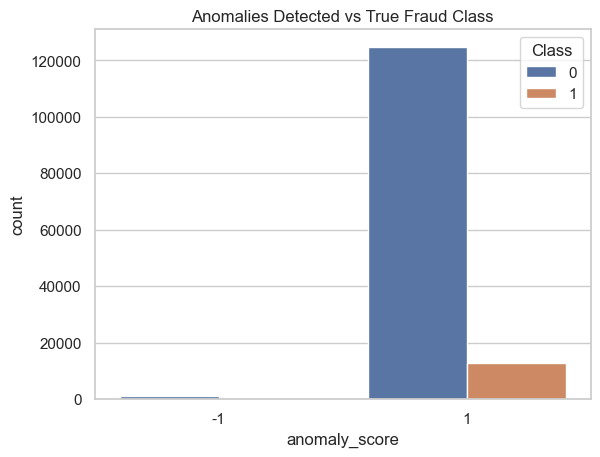

In [98]:
from sklearn.ensemble import IsolationForest

# Fit an Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.01)
fraud_data_combined['anomaly_score'] = iso_forest.fit_predict(fraud_data_combined.drop(columns=['Class']))

# Visualize anomalies
sns.countplot(x='anomaly_score', hue='Class', data=fraud_data_combined)
plt.title('Anomalies Detected vs True Fraud Class')
plt.show()

In [99]:
credit_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [100]:
credit_data.to_csv('../data/cleaned_data_2.csv', index=False, encoding='utf-8')

In [101]:
fraud_data.columns, credit_data.columns

(Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
        'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
       dtype='object'),
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
        'Class'],
       dtype='object'))